# Participant Evaluation Response EDA

Perform some basic Exploratory Data Analysis on Evaluations from the data. Initially, looking for such things as:

 - Number of responses, how many had text comments vs not
 - Distribution of Ratings
 - How many had PreRatings as well as Post Ratings
 

In [1]:
# import the activities from data file
import pandas as pd
import json
import itertools
import os
from pathlib import Path
import matplotlib.pyplot as plt

from py_files import cdn_utility as cdn
from py_files import graphing_utility as graph

c:\Users\nelso\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\nelso\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\nelso\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Load the JSON file and look at the contents
dfActivities = pd.read_json("data_files/activities.json", encoding="utf-8")

print(dfActivities.info())
dfActivities.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   activityName           355 non-null    object 
 1   activityDescription    355 non-null    object 
 2   activityType           355 non-null    object 
 3   organisationGoal       355 non-null    object 
 4   goalDescription        354 non-null    object 
 5   attendance             355 non-null    int64  
 6   projectStatus          355 non-null    object 
 7   activityPeriod         355 non-null    object 
 8   primaryPolicyDomain    355 non-null    object 
 9   secondaryPolicyDomain  355 non-null    object 
 10  actualExpenditure      355 non-null    float64
 11  activityAction         355 non-null    object 
 12  objectives             355 non-null    object 
 13  venues                 355 non-null    object 
 14  contractors            355 non-null    object 
 15  keyDat

,activityName,activityDescription,activityType,organisationGoal,goalDescription,attendance,projectStatus,activityPeriod,primaryPolicyDomain,secondaryPolicyDomain,actualExpenditure,activityAction,objectives,venues,contractors,keyData,evaluationPlans,reflection,analysis
0,2017 Victorian Cultural Development Planning,This is the first series of cultural developme...,Professional development,A culturally rich and vibrant Australia,Local government plays a key role in the provi...,72,COMPLETED,"{'startData': '2018-02-01', 'endDate': '2018-0...",Cultural,Economic,4087.0,"{'documentName': '', 'actionLabel': '', 'actio...","[{'objectiveId': 89, 'outcomeId': 10, 'outcome...","[{'venueName': '', 'venueType': 'Exhibition Ve...",[],"[{'key': 'sessions', 'title': 'Number of sessi...","[{'id': 1, 'name': 'Evaluation Plan', 'totalPa...",The respondents were in the greatest majority ...,None
1,Wonderland Youth Connect,Wonderland Shire presents an art-based showcas...,"Gathering, celebration or ceremony",A resilient and connected community,Council provides the resources and facilitatio...,20,COMPLETED,"{'startData': '2020-07-07', 'endDate': '2020-0...",Cultural,Social,6000.0,"{'documentName': '', 'actionLabel': '', 'actio...","[{'objectiveId': 99, 'outcomeId': 9, 'outcomeT...","[{'venueName': '', 'venueType': 'Outdoor publi...","[{'businessName': 'ArtScoop', 'acn': '32658838...","[{'key': 'sessions', 'title': 'Sessions', 'typ...","[{'id': 3, 'name': 'Evaluation Plan', 'totalPa...",The findings demonstrate minimal positive chan...,None
2,The Business of Being Creative,The Business of Being Creative is an innovativ...,Professional development,Abundant local jobs and economic opportunities,The economy across the shire is diverse enough...,20,COMPLETED,"{'startData': '2018-04-11', 'endDate': '2018-0...",Cultural,Economic,50000.0,"{'documentName': '', 'actionLabel': '', 'actio...","[{'objectiveId': 208, 'outcomeId': 30, 'outcom...","[{'venueName': '', 'venueType': 'Outdoor publi...","[{'businessName': 'Business Models Inc', 'acn'...","[{'key': 'sessions', 'title': 'Number of sessi...","[{'id': 6, 'name': 'Evaluation Plan', 'totalPa...","Being a relatively small cohort of 19, having ...",None
3,National Local Government Cultural Forum 2016-...,"In Australia, the local government cultural se...",Research and development,A culturally rich and vibrant Australia,Local government's reach across all Australian...,44,COMPLETED,"{'startData': '2016-01-01', 'endDate': '2018-1...",Cultural,[],456800.0,"{'documentName': '', 'actionLabel': '', 'actio...","[{'objectiveId': 194, 'outcomeId': 3, 'outcome...","[{'venueName': '', 'venueType': 'Meeting Room:...","[{'businessName': 'University of Melbourne, So...","[{'key': 'totalHours', 'title': 'Total hours c...","[{'id': 12, 'name': 'Evaluation Plan', 'totalP...",Members who attended and participated reported...,None
4,City of Stonnington - Graffiti Program Evaluation,An evaluation of the City of Stonnington Hit t...,Professional development,A culturally rich and vibrant Australia,Local government's reach across all Australian...,1,COMPLETED,"{'startData': '2018-05-17', 'endDate': '2018-0...",Cultural,Economic,13238.0,"{'documentName': '', 'actionLabel': '', 'actio...","[{'objectiveId': 199, 'outcomeId': 30, 'outcom...",[],[],"[{'key': 'sessions', 'title': 'Number of sessi...","[{'id': 13, 'name': 'Evaluation Plan', 'totalP...","When discussing the cultural outcome, it was n...",None
5,Future Artists Club,Future Artists Club is a day for making and pl...,Creative recreational,We can all benefit from the opportunities our ...,"The City of Parramatta is growing, and althoug...",33,COMPLETED,"{'startData': '2018-09-28', 'endDate': '2018-0...",Social,Cultural,16684.0,"{'documentName': '', 'actionLabel': '', 'actio...","[{'objectiveId': 376, 'outcomeId': 1, 'outcome...","[{'venueName': '', 'venueType': 'Workshop: for...","[{'businessName': 'Florence Araneigo', 'acn': ...","[{'key': 'sessions', 'title': 'Number of sessi.

There are 355 Activities in the JSON file

In [3]:
dfEvaluations = cdn.getEvaluationDfFromActivities(dfActivities)

print(dfEvaluations.info())
dfEvaluations.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6172 entries, 0 to 6171
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ActivityName      6172 non-null   object 
 1   PostResultId      6172 non-null   int64  
 2   PreResult         2773 non-null   float64
 3   PostResult        5926 non-null   float64
 4   OutcomeId         6172 non-null   int64  
 5   Domain            6172 non-null   object 
 6   OutcomeTitle      6172 non-null   object 
 7   MarginDifference  2773 non-null   float64
 8   UserComment       6137 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 434.1+ KB
None


,ActivityName,PostResultId,PreResult,PostResult,OutcomeId,Domain,OutcomeTitle,MarginDifference,UserComment
0,National Local Government Cultural Forum 2016-...,1,NaN,3.0,3,Cultural,"Knowledge, ideas and insight gained",NaN,
1,National Local Government Cultural Forum 2016-...,2,NaN,6.0,3,Cultural,"Knowledge, ideas and insight gained",NaN,
2,National Local Government Cultural Forum 2016-...,3,NaN,7.0,3,Cultural,"Knowledge, ideas and insight gained",NaN,
3,National Local Government Cultural Forum 2016-...,4,NaN,9.0,3,Cultural,"Knowledge, ideas and insight gained",NaN,
4,National Local Government Cultural Forum 2016-...,5,NaN,7.0,3,Cultural,"Knowledge, ideas and insight gained",NaN,
5,National Local Government Cultural Forum 2016-...,6,NaN,3.0,3,Cultural,"Knowledge, ideas and insight gained",NaN,
6,National Local Government Cultural Forum 2016-...,7,NaN,8.0,3,Cultural,"Knowledge, ideas and insight gained",NaN,
7,National Local Government Cultural Forum 2016-...,8,NaN,10.0,3,Cultural,"Knowledge, ideas and insight gained",NaN,
8,National Local Government Cultural Forum 2016-...,9,NaN,5.0,3,Cultural,"Knowledge, ideas and insight gained",NaN,
9,National Local Government Cultural Forum 2016-...,10,NaN,8.0,3,Cultural,"Knowledge, ideas and insight gained",NaN,


There are 6172 unique evaluation responses, therefore each Activity has an average of 17.39 Evaluation Responses

Now show a Distribution of Result Responses

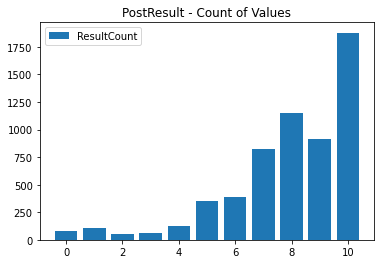

In [4]:
pltPostResults = graph.graphBasicBarDistribution(dfEvaluations, "PostResult")
pltPostResults.show()

Evaluation Responses are heavily skewed to the favourable, with 10 being the most common response and the majority of responses are 7 or more.

Now lets see the ratio of evaluations with comments vs no comments


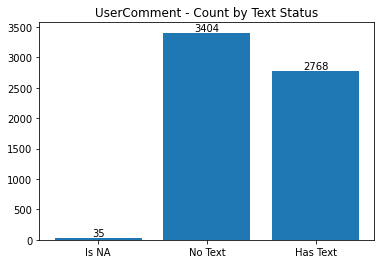

In [5]:
pltNoComment = graph.graphBasicEmptyTextDistribution(dfEvaluations, "UserComment")
pltNoComment.show()


More User Comments don't have any text comment, but are just a rating with no info. 2768 have comment text.

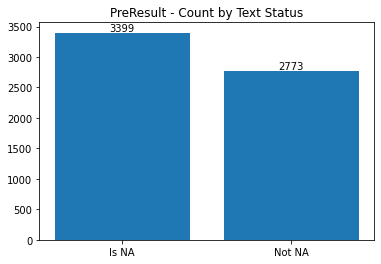

In [6]:
pltNoPreResult = graph.graphBasicNADistribution(dfEvaluations, "PreResult")
pltNoPreResult.show()

More responses do not have a pre-result, just a post result, though 2773 have a pre-result and a post-result.

In [7]:
dfHasPreResult = dfEvaluations[dfEvaluations["PreResult"] > 0]
print(dfHasPreResult.shape)
dfHasPreResult.head()

(2773, 9)


,ActivityName,PostResultId,PreResult,PostResult,OutcomeId,Domain,OutcomeTitle,MarginDifference,UserComment
11,Prize Fighter & Community Engagement Program,12,10.0,10.0,4,Cultural,Diversity of cultural expression appreciated,0.0,
12,Prize Fighter & Community Engagement Program,13,10.0,10.0,4,Cultural,Diversity of cultural expression appreciated,0.0,
13,Prize Fighter & Community Engagement Program,14,10.0,10.0,4,Cultural,Diversity of cultural expression appreciated,0.0,
14,Prize Fighter & Community Engagement Program,15,10.0,7.0,4,Cultural,Diversity of cultural expression appreciated,-3.0,
15,Prize Fighter & Community Engagement Program,16,8.0,7.0,4,Cultural,Diversity of cultural expression appreciated,-1.0,


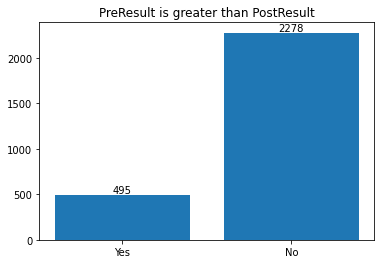

In [9]:
mskPreResultGreater = dfHasPreResult["PreResult"] > dfHasPreResult["PostResult"]
pltPreResultGreater = graph.graphBasicConditionDistribution(dfHasPreResult, mskPreResultGreater, "PreResult is greater than PostResult")
pltPreResultGreater.show()

There is a not insignificant number of Evaluations where the Preresult is more than the Post Result. This is somewhat unexpected, wondering whether this might be a case of people 

In [23]:
#dfHasPreResult[(dfHasPreResult["PreResult"] > dfHasPreResult["PostResult"]) & (dfHasPreResult["UserComment"] != "")].head(50)
pd.options.display.max_colwidth = 400
dfHasPreResult[(mskPreResultGreater) & (dfHasPreResult["UserComment"] != "")][["PreResult", "PostResult", "UserComment"]].head(50)

C:\Users\nelso\AppData\Local\Temp/ipykernel_18932/2373965929.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfHasPreResult["UserComment"] = dfHasPreResult["UserComment"].str.replace("\n", " ")


In [ ]:

dfHasPreResult["UserComment"] = dfHasPreResult["UserComment"].str.replace("\n", " ")
dfHasPreResult[(mskPreResultGreater) & (dfHasPreResult["UserComment"] != "")][["PreResult", "PostResult", "UserComment"]].to_csv("./data_files/UnusualPreRatings.csv", index=False)